In [4]:
#import required libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load the dataset
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* Most customers are not senior citizens.
* 25% of customers have a tenure of 9 months or less, 50% have a tenure of 29 months or less, and 75% have a tenure of 55 months or less.Tenure varies widely, indicating a diverse customer base in terms of how long they have been with the company.
* The "MonthlyCharges" variable indicates the monthly charge a customer pays.25% of customers pay $35.50 or less per month, 50% pay $70.35 or less, and 75% pay $89.85 or less.

In [10]:
# applying loop to check all unique value without int or float in dataset
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#Total Charges should be numeric amount. convert it into numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#null values in TotalCharges
df[df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
# percent of null values in TotalCharges
df['TotalCharges'].isnull().mean() * 100

0.1561834445548772

* Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [16]:
# drop missing values
df.dropna(inplace=True)

In [17]:
# drop customerID 
df.drop('customerID', axis=1, inplace=True)

* Unique Value: Each Customer ID is unique and does not provide any meaningful information about the customer's behavior or characteristics.
* No Correlation: Customer ID does not have any inherent correlation with churn or other relevant features.
* Potential Overfitting: Including unique identifiers can lead to overfitting, where the model learns patterns specific to the training data but fails to generalize to new data.

In [18]:
#churn count
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [19]:
#churn customers percent
df['Churn'].value_counts()/len(df['Churn'])*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [20]:
# Churn custmers in senior citizen
churn_by_snc_1 = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts()
churn_by_snc_0 = df[df['Churn'] == 'No']['SeniorCitizen'].value_counts()
print("churned in Senior Citizen")
print(churn_by_snc_1)
print("Not churned in Senior Citizen")
print(churn_by_snc_0)

churned in Senior Citizen
0    1393
1     476
Name: SeniorCitizen, dtype: int64
Not churned in Senior Citizen
0    4497
1     666
Name: SeniorCitizen, dtype: int64


In [21]:
# Churn customers in gender
churn_by_gen_1 = df[df['Churn'] == 'Yes']['gender'].value_counts()
churn_by_gen_0 = df[df['Churn'] == 'No']['gender'].value_counts()
print("churned in Gender")
print(churn_by_gen_1)
print("Not churned in Gender")
print(churn_by_gen_0)

churned in Gender
Female    939
Male      930
Name: gender, dtype: int64
Not churned in Gender
Male      2619
Female    2544
Name: gender, dtype: int64


In [22]:
# Churn customers in partner
churn_by_part_1 = df[df['Churn'] == 'Yes']['Partner'].value_counts()
churn_by_part_0 = df[df['Churn'] == 'No']['Partner'].value_counts()
print("churned in partner")
print(churn_by_part_1)
print("Not churned in partner")
print(churn_by_part_0)

churned in partner
No     1200
Yes     669
Name: Partner, dtype: int64
Not churned in partner
Yes    2724
No     2439
Name: Partner, dtype: int64


In [23]:
# Churn customers in dependents
churn_by_dep_1 = df[df['Churn'] == 'Yes']['Dependents'].value_counts()
churn_by_dep_0 = df[df['Churn'] == 'No']['Dependents'].value_counts()
print("churned in Dependents")
print(churn_by_dep_1)
print("Not churned in Dependents")
print(churn_by_dep_0)

churned in Dependents
No     1543
Yes     326
Name: Dependents, dtype: int64
Not churned in Dependents
No     3390
Yes    1773
Name: Dependents, dtype: int64


In [24]:
# Churn customers in contract
churn_by_contract_1 = df[df['Churn'] == 'Yes']['Contract'].value_counts()
churn_by_contract_0 = df[df['Churn'] == 'No']['Contract'].value_counts()
print("churned in Contract")
print(churn_by_dep_1)
print("Not churned in Contract")
print(churn_by_dep_0)

churned in Contract
No     1543
Yes     326
Name: Dependents, dtype: int64
Not churned in Contract
No     3390
Yes    1773
Name: Dependents, dtype: int64


In [25]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

* pd.cut: This function bins the tenure column into the specified intervals and assigns the corresponding labels.
* right=True: Indicates that the intervals are closed on the right, meaning the right endpoint is included in the interval.

In [26]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [27]:
# Churn customers in tenure_group
churn_by_tenure_group_1 = df[df['Churn'] == 'Yes']['tenure_group'].value_counts()
churn_by_tenure_group_0 = df[df['Churn'] == 'No']['tenure_group'].value_counts()
print("churned in tenure_group")
print(churn_by_tenure_group_1)
print("Not churned in tenure_group")
print(churn_by_tenure_group_0)

churned in tenure_group
1 - 12     1037
13 - 24     294
25 - 36     180
37 - 48     145
49 - 60     120
61 - 72      93
Name: tenure_group, dtype: int64
Not churned in tenure_group
61 - 72    1314
1 - 12     1138
13 - 24     730
49 - 60     712
25 - 36     652
37 - 48     617
Name: tenure_group, dtype: int64


In [28]:
df.drop(columns= ['tenure'], axis=1, inplace=True)

## Univariate Analysis

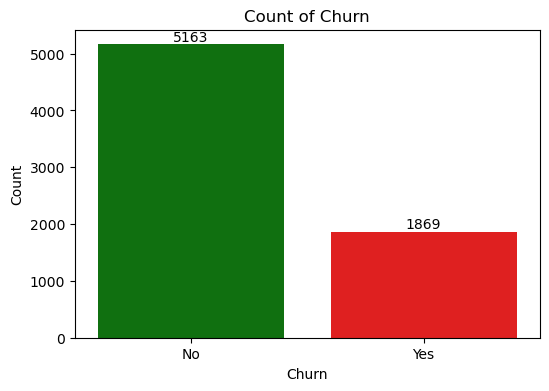

In [29]:
# Countplot of Churn
plt.figure(figsize=(6, 4))
a=sns.countplot(x='Churn', data=df,palette=['green', 'red'])
plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
a.bar_label(a.containers[0])
plt.show()


<AxesSubplot:xlabel='gender', ylabel='count'>

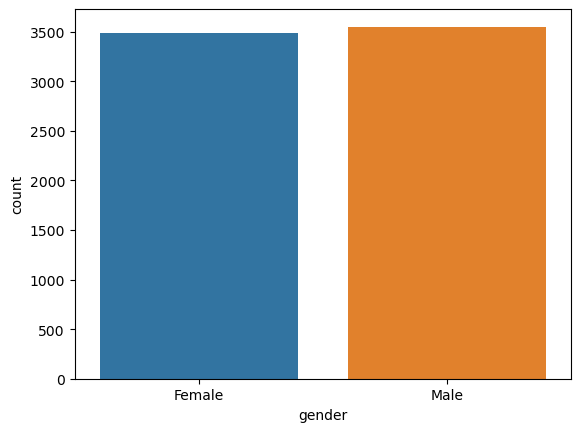

In [30]:
#count of gender
sns.countplot(x='gender', data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

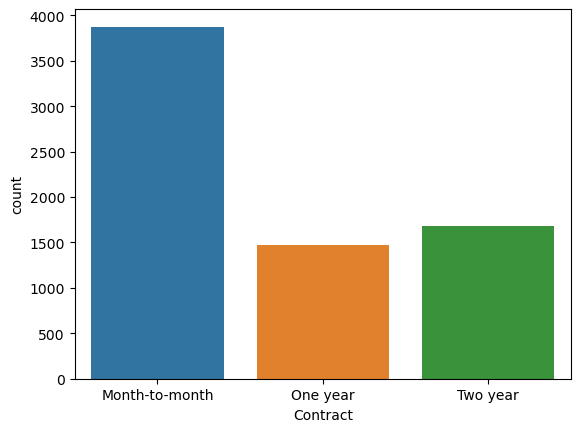

In [31]:
#count of contract
sns.countplot(x='Contract', data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

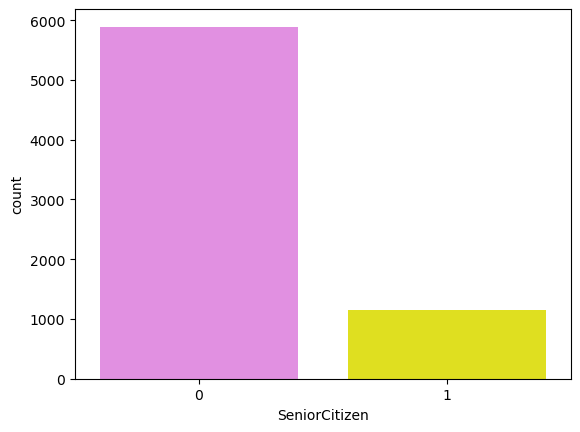

In [32]:
#count of Senior Citizen
sns.countplot(x='SeniorCitizen', data=df,palette=['violet', 'yellow'])

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

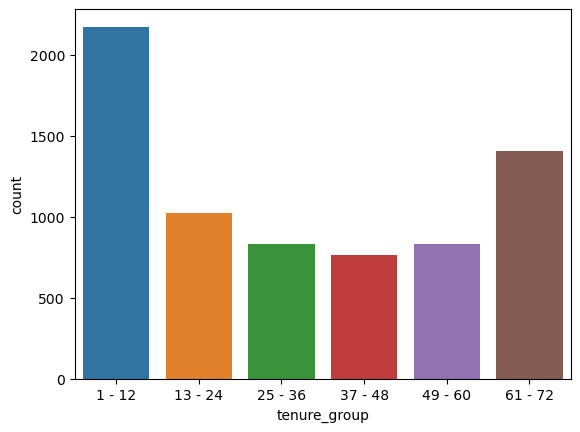

In [33]:
#count of Senior tenure group
sns.countplot(x='tenure_group', data=df)

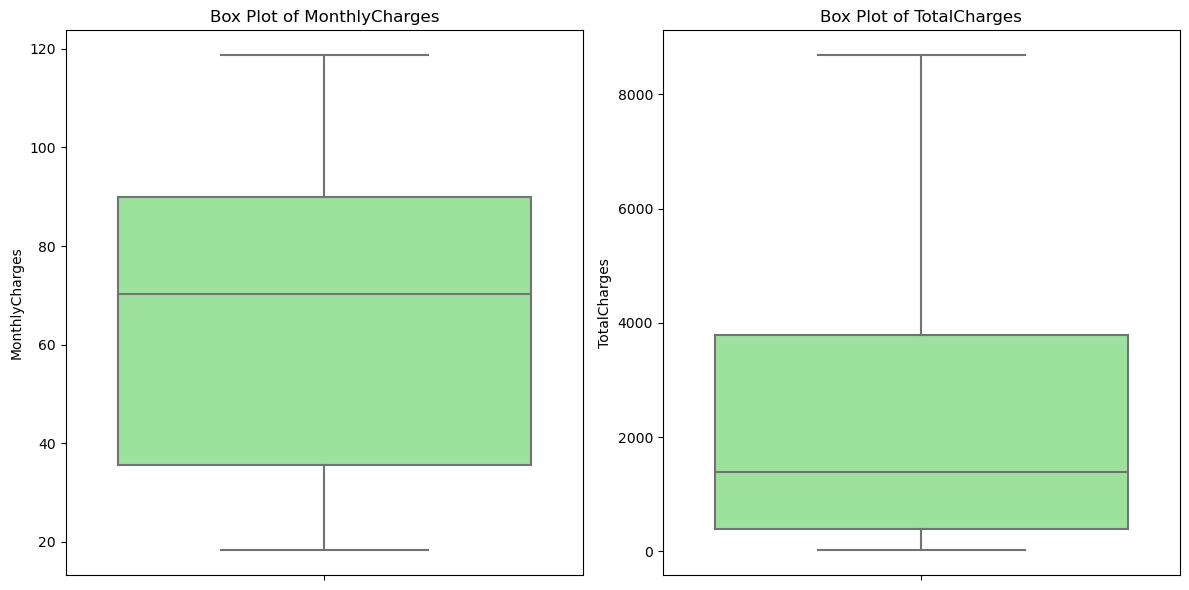

In [34]:
# Plot box plots for numerical columns
numerical_columns = ['MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(12, 6))

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, y=column, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


In [36]:
# Calculate box plot statistics for MonthlyCharges
def box_plot_stats(data, column_name):
    Q1 = data.quantile(0.25)
    Q2 = data.median()
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = data[data >= Q1 - 1.5 * IQR].min()
    upper_whisker = data[data <= Q3 + 1.5 * IQR].max()
    
    return {
        'Column': column_name,
        'Lower Whisker': lower_whisker,
        'Q1 (25th percentile)': Q1,
        'Median (Q2/50th percentile)': Q2,
        'Q3 (75th percentile)': Q3,
        'Upper Whisker': upper_whisker,
        'IQR': IQR
    }

# Calculate box plot statistics for MonthlyCharges
monthly_charges_stats = box_plot_stats(df['MonthlyCharges'], 'MonthlyCharges')

# Print the statistics for MonthlyCharges
for key, value in monthly_charges_stats.items():
    print(f"{key}: {value}")

# Calculate box plot statistics for TotalCharges
total_charges_stats = box_plot_stats(df['TotalCharges'], 'TotalCharges')

# Print the statistics for TotalCharges
for key, value in total_charges_stats.items():
    print(f"{key}: {value}")


Column: MonthlyCharges
Lower Whisker: 18.25
Q1 (25th percentile): 35.5875
Median (Q2/50th percentile): 70.35
Q3 (75th percentile): 89.8625
Upper Whisker: 118.75
IQR: 54.275
Column: TotalCharges
Lower Whisker: 18.8
Q1 (25th percentile): 401.45
Median (Q2/50th percentile): 1397.475
Q3 (75th percentile): 3794.7375
Upper Whisker: 8684.8
IQR: 3393.2875000000004


* MonthlyCharges Distribution:
* 1.The majority of customers have monthly charges ranging from approximately 35 to 90, as indicated by the interquartile range (IQR).
* 2.There are some customers with significantly higher monthly charges, represented by the upper whisker extending to 118.75 dollars.
* The median monthly charge of 70.35 suggests that half of the customers have a monthly charge below this valueindicating a relatively balanced distribution.
* TotalCharges Variation:

* 1.The total charges exhibit a wider spread compared to monthly charges, as evidenced by the larger interquartile range (IQR) of 3393.29.
* 2.The upper whisker extends up to 8684.80 , indicating the presence of customers with substantially higher total charges.
* 3.Despite the wide variability, the median total charge of 1397.48 suggests that half of the customers have a total charge below this value, highlighting the significant variation in customer spending.

## Bivariate Analysis

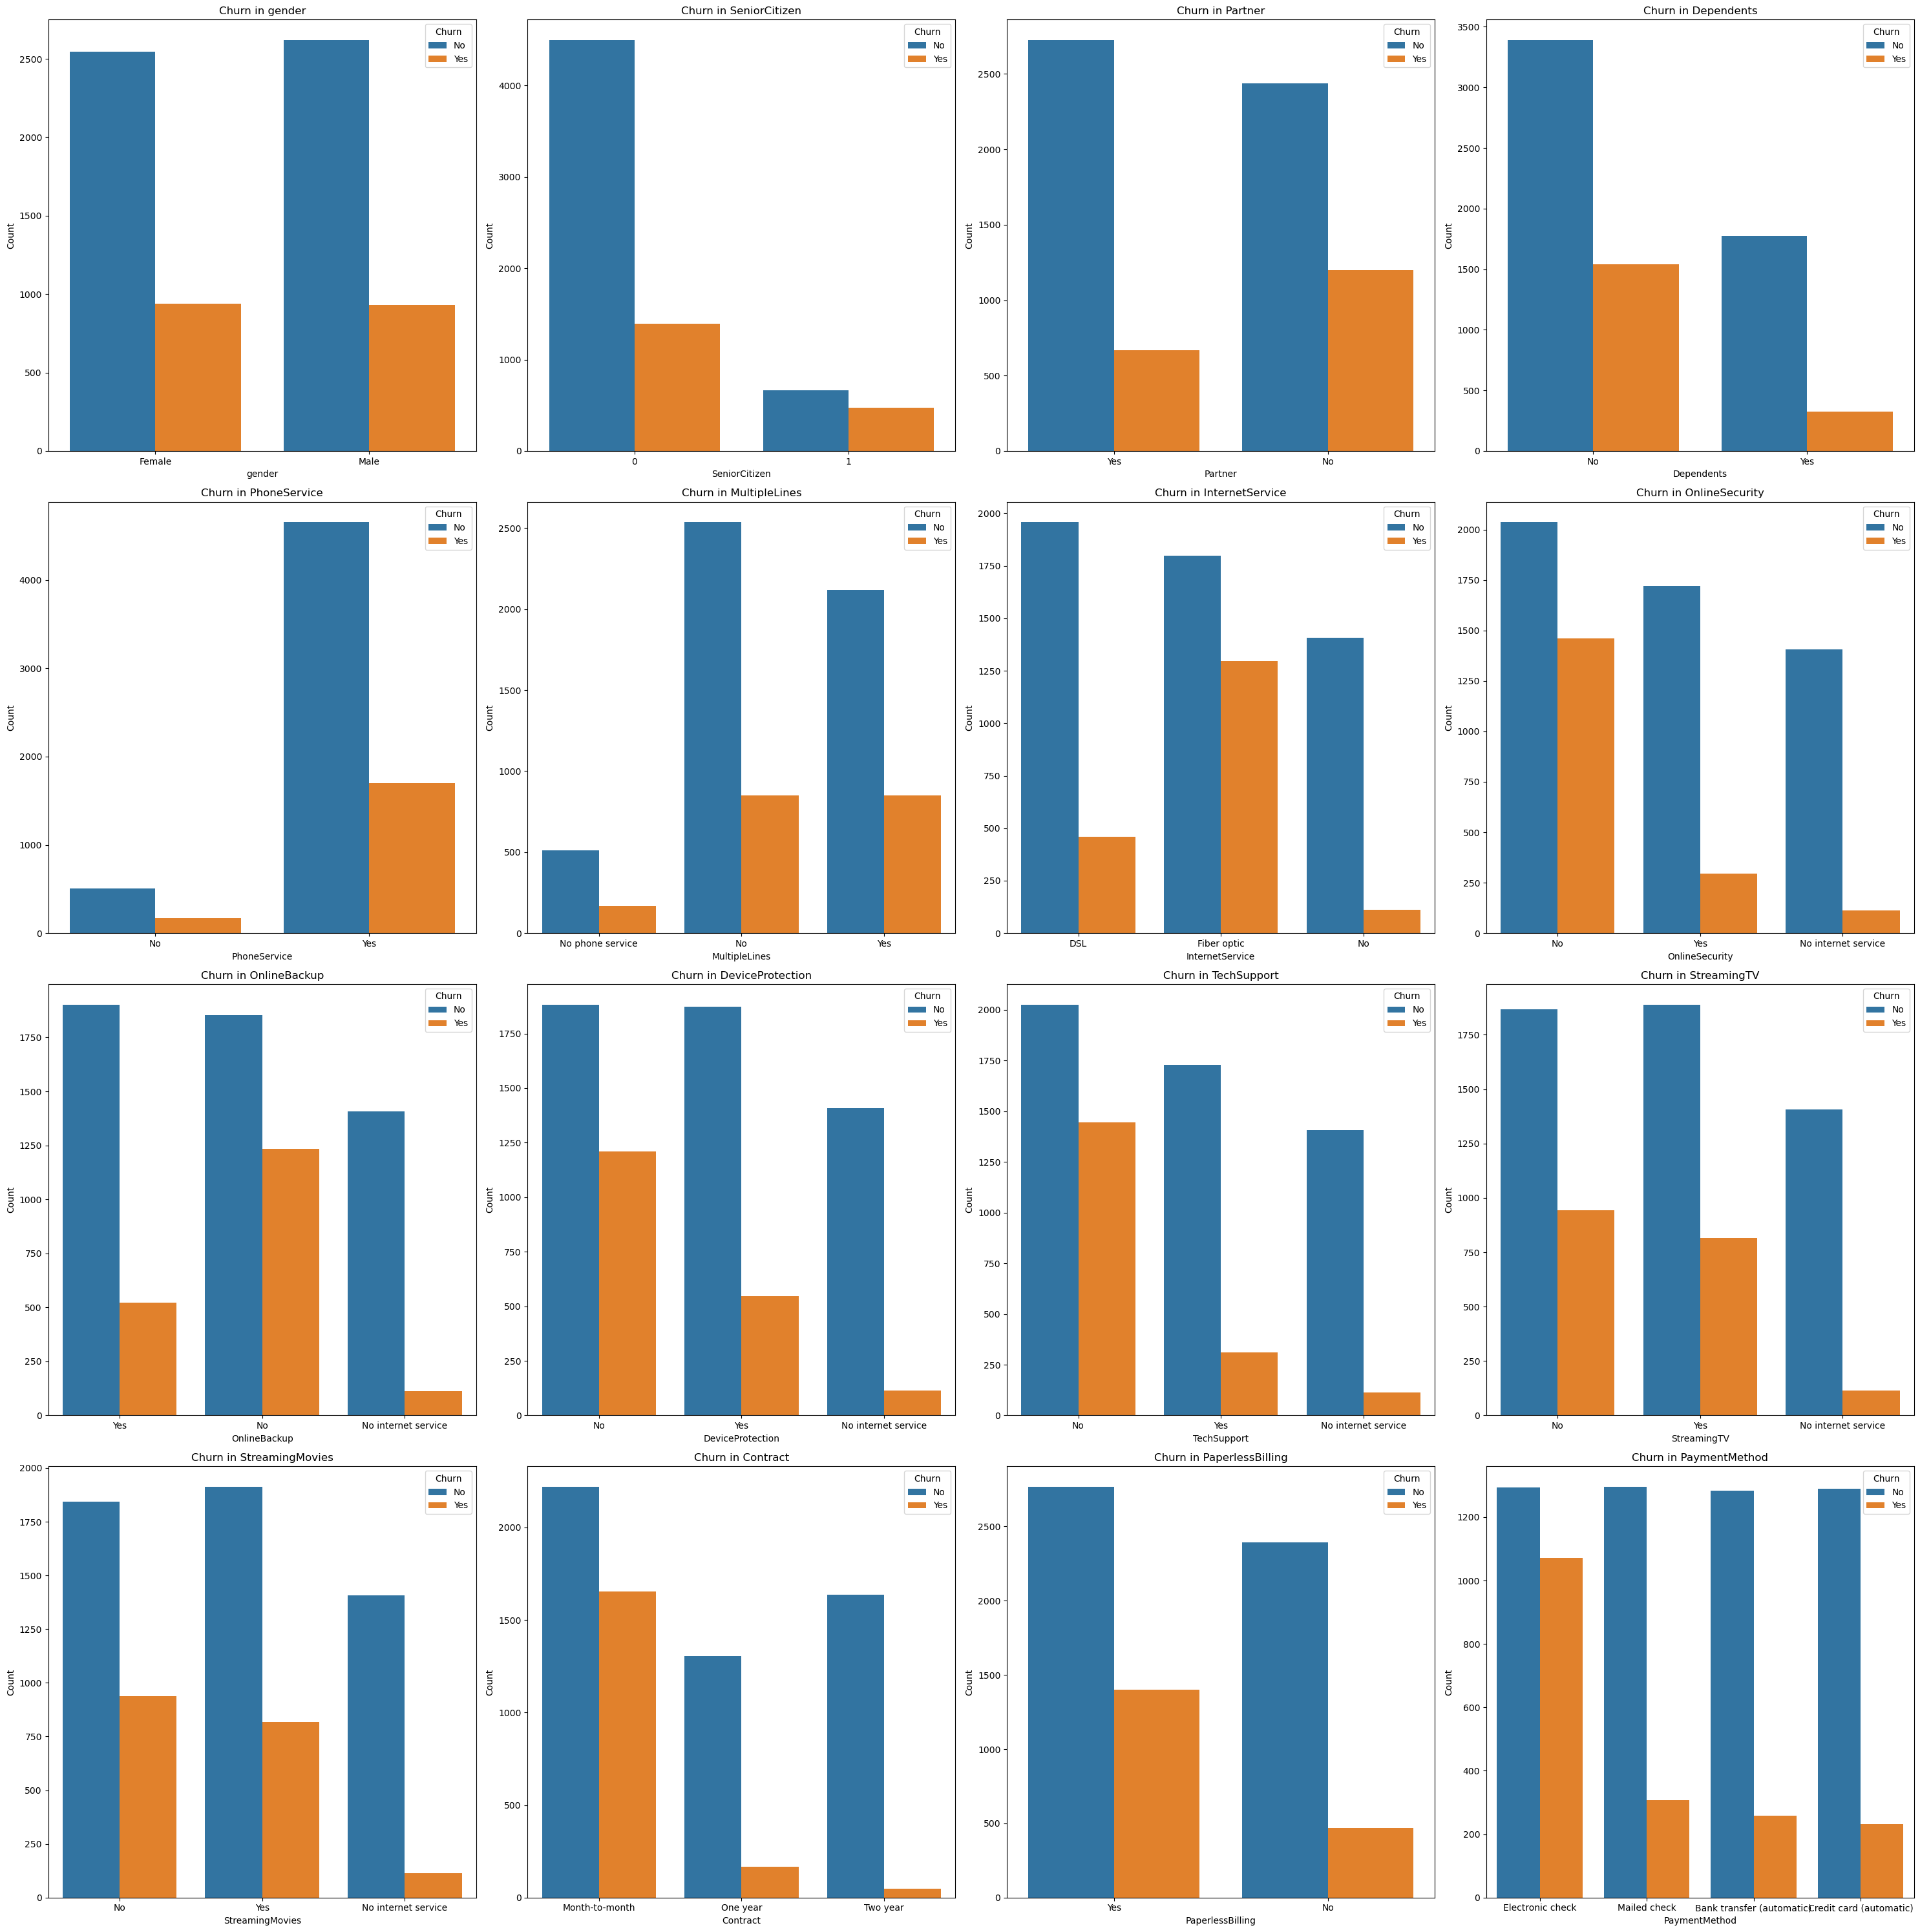

In [170]:
# Defining the columns to plot (excluding 'Churn' column and specified columns)
columns_to_plot = df.columns.drop(['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure_group'])

# Set up the subplot grid
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

# Flatten the axes array for easier iteration
# It converts a multi-dimensional array into a one-dimensional array, where all the axes objects are arranged in a single line.
axes = axes.flatten()

# Iterating through each column and creating a countplot
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn in {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


* These are some of the quick insights:

* 1. Electronic check medium are the highest churners
* 2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
* 3. No Online security, No Tech Support category are high churners
* 4. Non senior Citizens are high churners


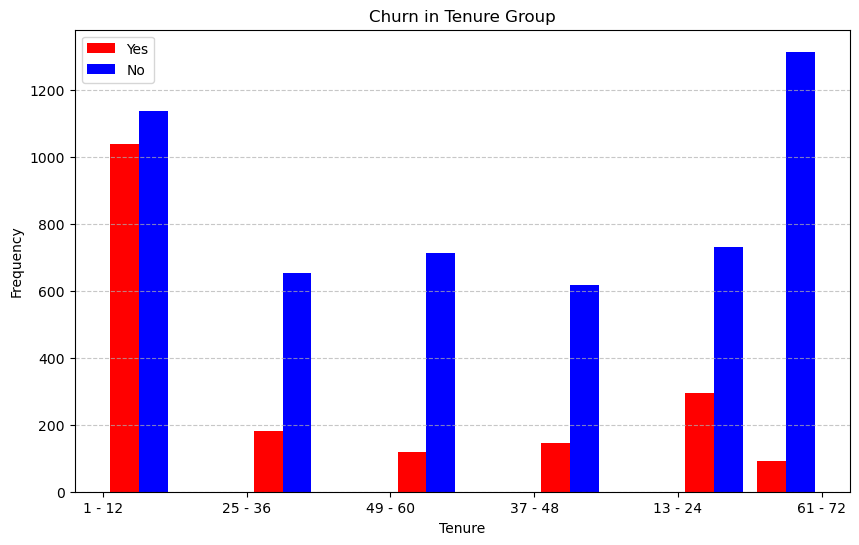

In [111]:
# make plot for tenure
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure_group'], not_churned['tenure_group']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('Churn in Tenure Group')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

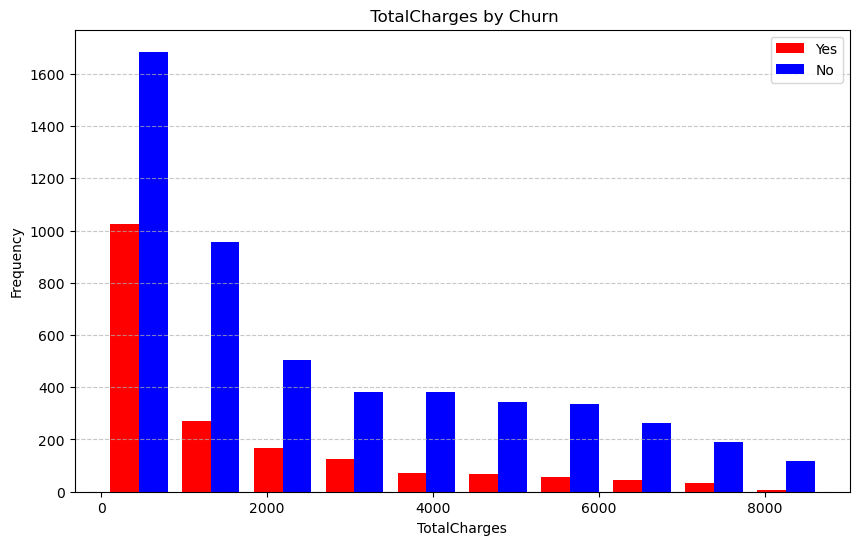

In [167]:
# make plot for total charges
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

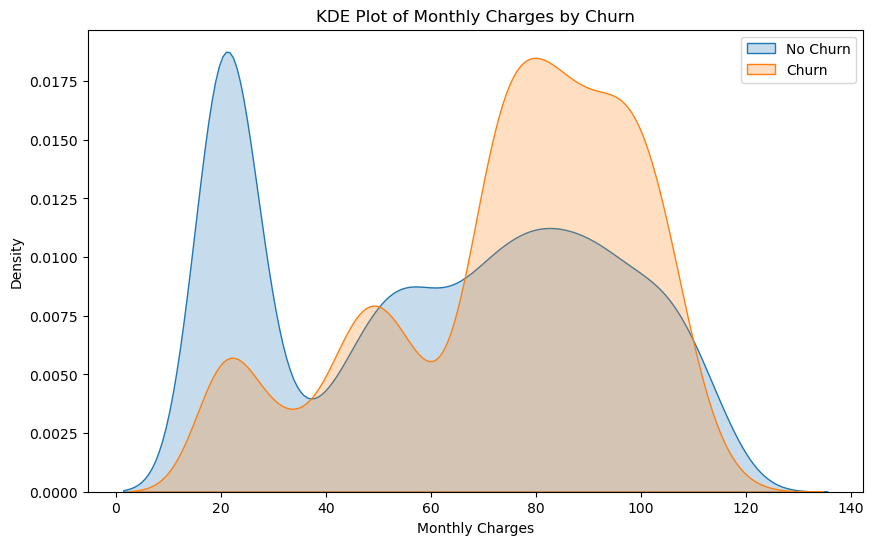

In [166]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Churn'] == 'No'], x='MonthlyCharges', label='No Churn', shade=True)
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='MonthlyCharges', label='Churn', shade=True)
plt.title('KDE Plot of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()


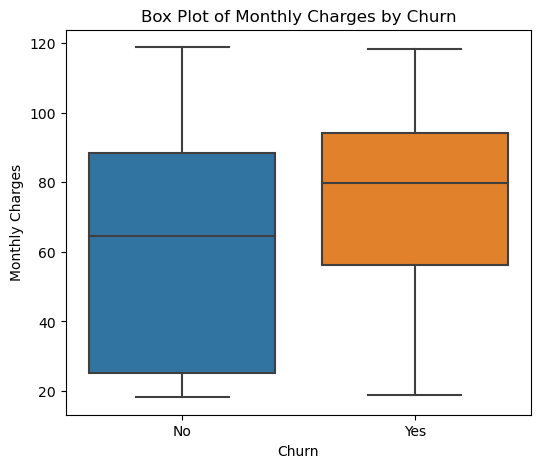

In [158]:
#boxplot for Monthly charges by Churn
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Box Plot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


In [159]:
# Calculating the box plot statistics for MonthlyCharges by Churn
churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
churn_no = df[df['Churn'] == 'No']['MonthlyCharges']

def box_plot_stats(data):
    Q1 = data.quantile(0.25)
    Q2 = data.median()
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = data[data >= Q1 - 1.5 * IQR].min()
    upper_whisker = data[data <= Q3 + 1.5 * IQR].max()
    
    return {
        'Lower Whisker': lower_whisker,
        'Q1 (25th percentile)': Q1,
        'Median (Q2/50th percentile)': Q2,
        'Q3 (75th percentile)': Q3,
        'Upper Whisker': upper_whisker,
        'IQR': IQR
    }

churn_yes_stats = box_plot_stats(churn_yes)
churn_no_stats = box_plot_stats(churn_no)

print("Churn = Yes")
for key, value in churn_yes_stats.items():
    print(f"{key}: {value}")

print("\nChurn = No")
for key, value in churn_no_stats.items():
    print(f"{key}: {value}")


Churn = Yes
Lower Whisker: 18.85
Q1 (25th percentile): 56.15
Median (Q2/50th percentile): 79.65
Q3 (75th percentile): 94.2
Upper Whisker: 118.35
IQR: 38.050000000000004

Churn = No
Lower Whisker: 18.25
Q1 (25th percentile): 25.1
Median (Q2/50th percentile): 64.45
Q3 (75th percentile): 88.475
Upper Whisker: 118.75
IQR: 63.37499999999999


* The median monthly charge for customers who churned 79.65 is significantly higher than for those who did not churn 64.45.This suggests that customers with higher monthly charges are more likely to churn.
* The IQR for customers who churned is 38.05, while the IQR for customers who did not churn is 63.37.This indicates that there is a wider spread of monthly charges among customers who did not churn compared to those who did.

## Multivariate Analysis

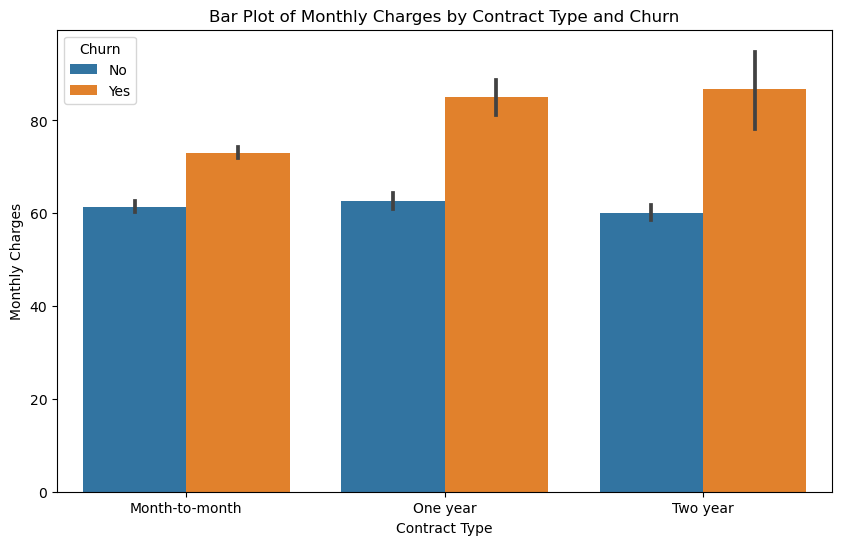

In [37]:
#Bar Plot of Monthly Charges by Contract Type and Churn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Bar Plot of Monthly Charges by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()



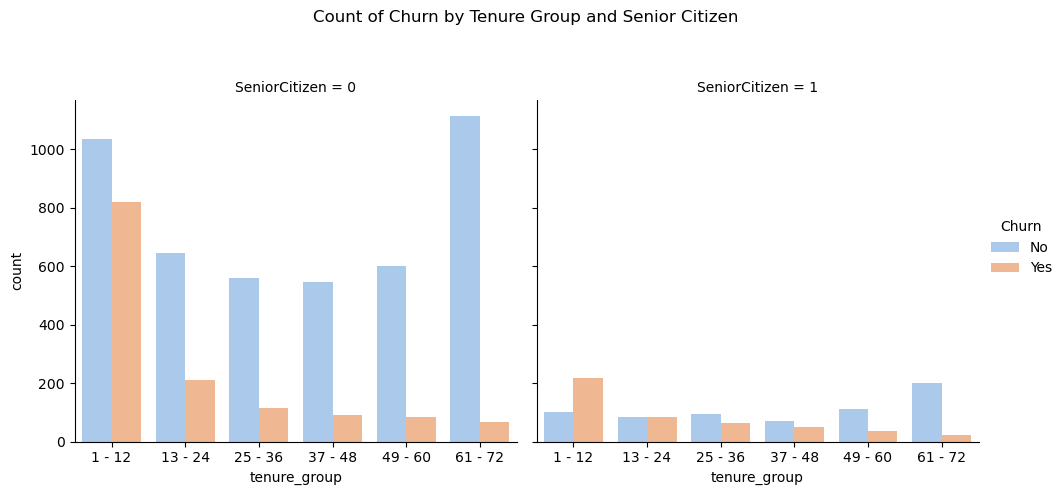

In [38]:
# Plot multivariate plot for 'SeniorCitizen', 'Churn', and 'tenure_group'
sns.catplot(data=df, x='tenure_group', hue='Churn', col='SeniorCitizen', kind='count', palette='pastel')
plt.subplots_adjust(top=0.8)
plt.suptitle('Count of Churn by Tenure Group and Senior Citizen')
plt.show()


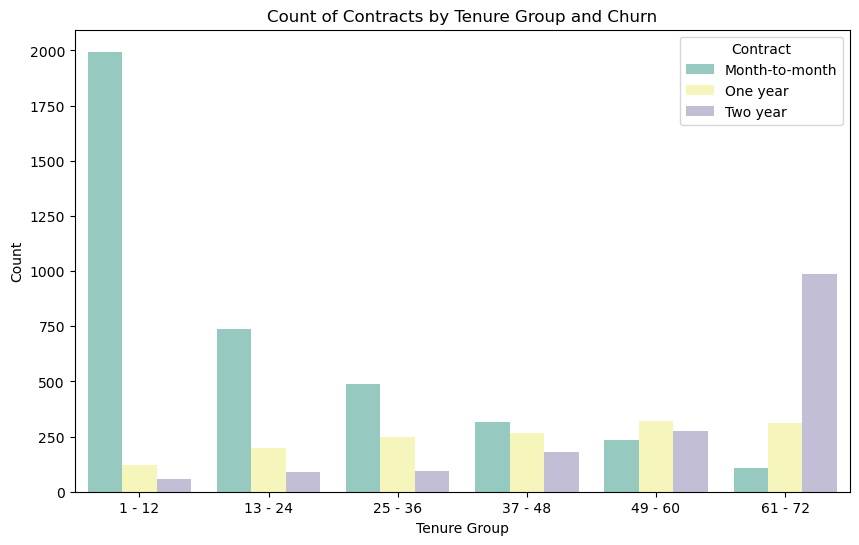

In [39]:
#'Count of Contracts by Tenure Group and Churn'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tenure_group', hue='Contract', palette='Set3')
plt.title('Count of Contracts by Tenure Group and Churn')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.show()


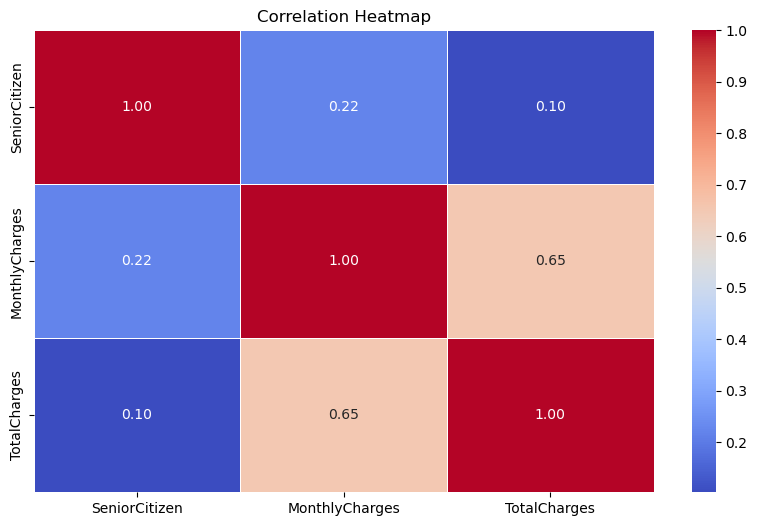

In [40]:
# Calculate the correlation matrix
b = df[['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [41]:
correlation_matrix

,SeniorCitizen,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.219874,0.102411
MonthlyCharges,0.219874,1.000000,0.651065
TotalCharges,0.102411,0.651065,1.000000


In [187]:
#Converting the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [188]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [189]:
#Converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


<AxesSubplot:>

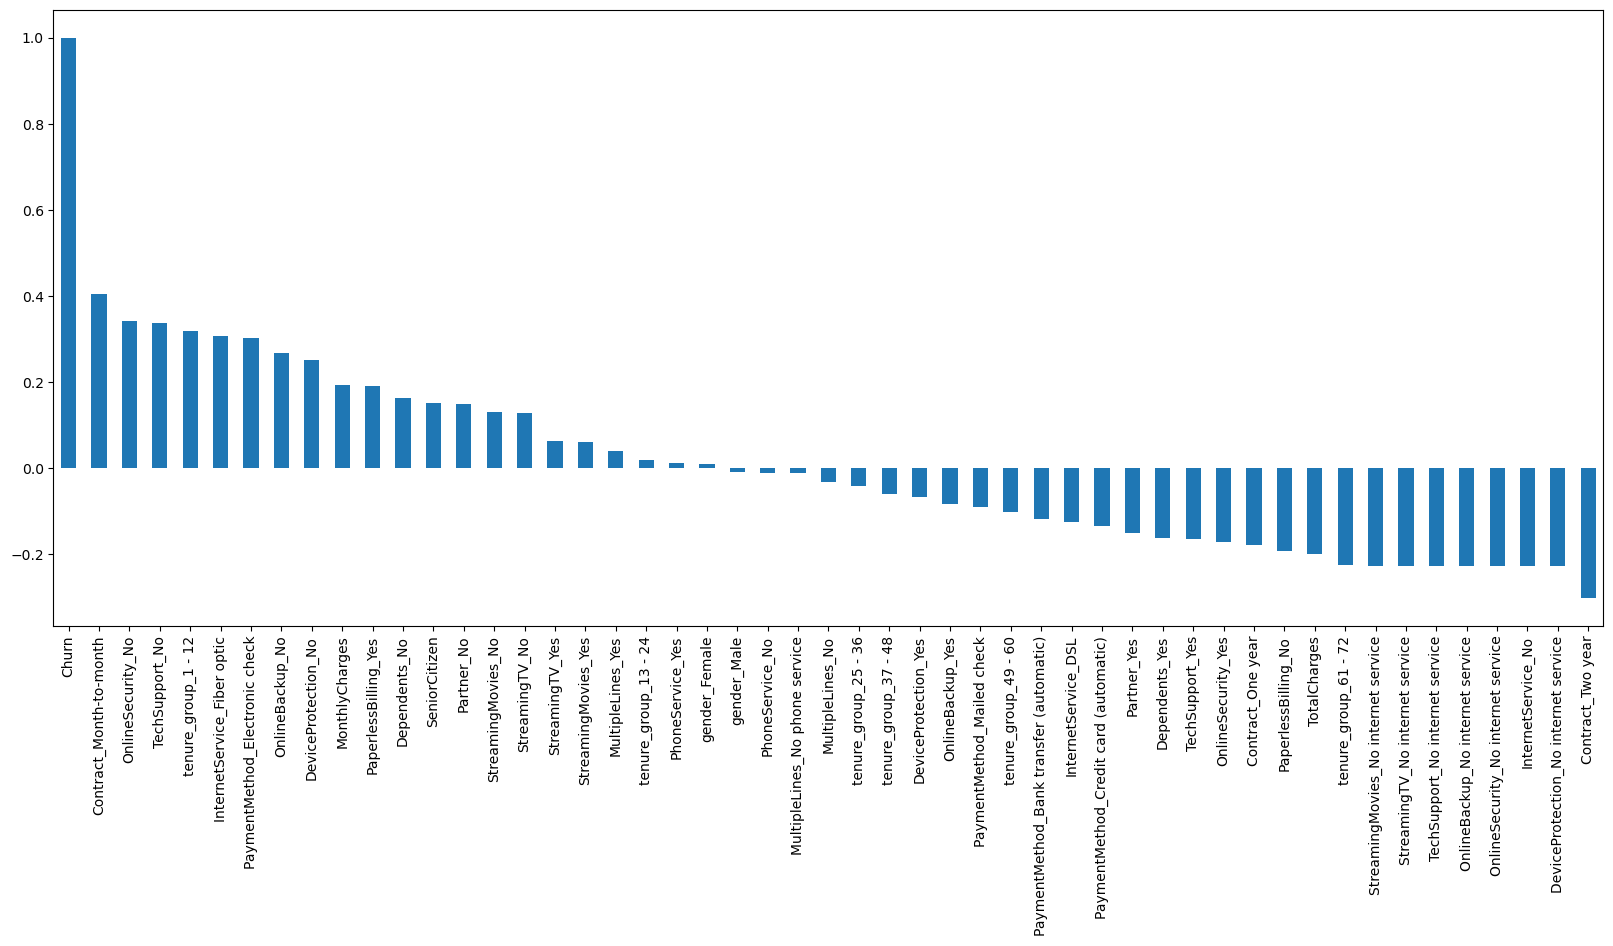

In [190]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

* Insights:
* HIGH Churn seen in case of  Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

* LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

* Factors like Gender, Availability of PhoneService and #  multiple lines have alomost NO impact on Churn


# Model Building

In [191]:
df_dummies.to_csv('updated_tele_data.csv')

In [102]:
#import required libraries
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [7]:
df1=pd.read_csv("updated_tele_data.csv")
df1.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [8]:
#drop the Unnamed column
df1=df1.drop('Unnamed: 0',axis=1)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   int64  
 5   gender_Male                              7032 non-null   int64  
 6   Partner_No                               7032 non-null   int64  
 7   Partner_Yes                              7032 non-null   int64  
 8   Dependents_No                            7032 non-null   int64  
 9   Dependents_Yes                           7032 non-null   int64  
 10  PhoneService_No                          7032 no

In [10]:
x=df1.drop('Churn',axis=1)
y=df1['Churn']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Before Balancing the Dataset

In [75]:
#Define the Metrics Printing Function
model_scores=[]
def print_metrics(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    model_scores.append({'Model': model_name, 'Accuracy': accuracy_score(y_test, y_pred)})


### Decision Tree Classifier

In [76]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [77]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [78]:
y_pred_dt=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
print_metrics(y_test, y_pred_dt, "Decision Tree")

Decision Tree Performance:
Accuracy: 0.7995735607675906
Precision: 0.6809338521400778
Recall: 0.4666666666666667
F1-Score: 0.5537974683544303

Confusion Matrix:
 [[950  82]
 [200 175]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1032
           1       0.68      0.47      0.55       375

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



### Random Forest Classifier

In [81]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [82]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [83]:
y_pred_rf=model_rf.predict(x_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
print_metrics(y_test, y_pred_rf, "Random Forest")

Random Forest Performance:
Accuracy: 0.8002842928216063
Precision: 0.6910569105691057
Recall: 0.4533333333333333
F1-Score: 0.5475040257648953

Confusion Matrix:
 [[956  76]
 [205 170]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1032
           1       0.69      0.45      0.55       375

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



### KNN 

In [86]:
model_knn = KNeighborsClassifier(n_neighbors=5)

In [87]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [88]:
y_predict_knn = model_knn.predict(x_test)
y_predict_knn

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [89]:
print_metrics(y_test, y_predict_knn, "KNN")

KNN Performance:
Accuracy: 0.7782515991471215
Precision: 0.6153846153846154
Recall: 0.448
F1-Score: 0.5185185185185185

Confusion Matrix:
 [[927 105]
 [207 168]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1032
           1       0.62      0.45      0.52       375

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



# After Balancing the Data Using SMOTTEN

### Balancing the Data

In [64]:
# Apply SMOTEENN to balance the data
smote_enn = SMOTEENN(random_state=100)
x_resampled, y_resampled = smote_enn.fit_resample(x, y)

# Split the resampled data
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=100)


### Hyperparameter Tuning

In [65]:
# Hyperparameter tuning for Decision Tree
dt_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=100), param_grid=dt_params, cv=5, n_jobs=-1, scoring='f1')
dt_grid_search.fit(x_train_res, y_train_res)

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=rf_params, cv=5, n_jobs=-1, scoring='f1')
rf_grid_search.fit(x_train_res, y_train_res)

# Hyperparameter tuning for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_params, cv=5, n_jobs=-1, scoring='f1')
knn_grid_search.fit(x_train_res, y_train_res)

# Best estimators
best_dt = dt_grid_search.best_estimator_
best_rf = rf_grid_search.best_estimator_
best_knn = knn_grid_search.best_estimator_

print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best KNN Parameters:", knn_grid_search.best_params_)


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


### Decision Tree 

In [91]:
# Train the Decision Tree model
best_dt.fit(x_train_res, y_train_res)
# Predict
y_bal_pred_dt = best_dt.predict(x_test_res)
# Print metrics
print_metrics(y_test_res, y_bal_pred_dt, "Decision Tree (Balanced)")


Decision Tree (Balanced) Performance:
Accuracy: 0.9376068376068376
Precision: 0.9282442748091603
Recall: 0.9589905362776026
F1-Score: 0.943366951124903

Confusion Matrix:
 [[489  47]
 [ 26 608]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       536
           1       0.93      0.96      0.94       634

    accuracy                           0.94      1170
   macro avg       0.94      0.94      0.94      1170
weighted avg       0.94      0.94      0.94      1170



### Random Forest

In [92]:
# Train the Random Forest model
best_rf.fit(x_train_res, y_train_res)
# Predict
y_bal_pred_rf = best_rf.predict(x_test_res)
# Print metrics
print_metrics(y_test_res, y_bal_pred_rf, "Random Forest (Balanced)")


Random Forest (Balanced) Performance:
Accuracy: 0.9512820512820512
Precision: 0.9325337331334332
Recall: 0.9810725552050473
F1-Score: 0.9561875480399693

Confusion Matrix:
 [[491  45]
 [ 12 622]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       536
           1       0.93      0.98      0.96       634

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170



### KNN

In [93]:
# Train the KNN model
best_knn.fit(x_train_res, y_train_res)
# Predict
y_bal_pred_knn = best_knn.predict(x_test_res)
# Print metrics
print_metrics(y_test_res, y_bal_pred_knn, "KNN (Balanced)")


KNN (Balanced) Performance:
Accuracy: 0.9794871794871794
Precision: 0.9750778816199377
Recall: 0.9873817034700315
F1-Score: 0.9811912225705329

Confusion Matrix:
 [[520  16]
 [  8 626]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       536
           1       0.98      0.99      0.98       634

    accuracy                           0.98      1170
   macro avg       0.98      0.98      0.98      1170
weighted avg       0.98      0.98      0.98      1170



In [94]:
model_scores

[{'Model': 'Decision Tree', 'Accuracy': 0.7995735607675906},
 {'Model': 'Random Forest', 'Accuracy': 0.8002842928216063},
 {'Model': 'KNN', 'Accuracy': 0.7782515991471215},
 {'Model': 'Decision Tree (Balanced)', 'Accuracy': 0.9376068376068376},
 {'Model': 'Random Forest (Balanced)', 'Accuracy': 0.9512820512820512},
 {'Model': 'KNN (Balanced)', 'Accuracy': 0.9794871794871794}]

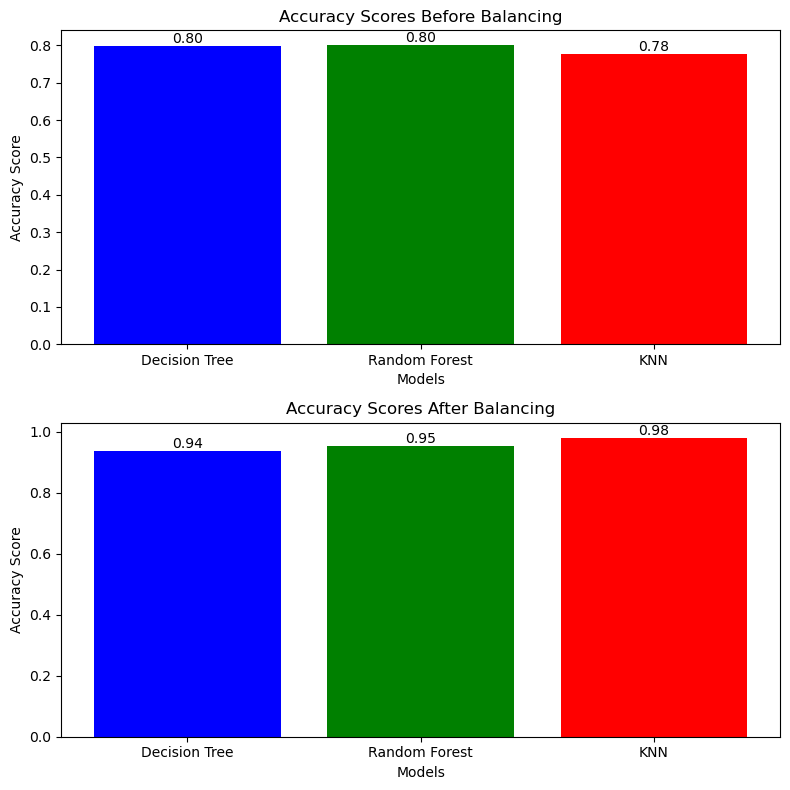

In [101]:
# Model scores without balancing
models = [model['Model'] for model in model_scores[:3]]
accuracy_scores = [model['Accuracy'] for model in model_scores[:3]]

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
bars = plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.title('Accuracy Scores Before Balancing')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

# Add accuracy scores on top of bars
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

# Model scores with balancing
models_balanced = [model['Model'] for model in model_scores[:3]]
accuracy_scores_balanced = [model['Accuracy'] for model in model_scores[3:]]

plt.subplot(2, 1, 2)
bars = plt.bar(models_balanced, accuracy_scores_balanced, color=['blue', 'green', 'red'])
plt.title('Accuracy Scores After Balancing')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

# Add accuracy scores on top of bars
for bar, score in zip(bars, accuracy_scores_balanced):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### If SMOTTEN is not working please upgrade with this commands

In [156]:
!pip install --upgrade scikit-learn imbalanced-learn --user


  Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)


In [159]:
pip install --upgrade threadpoolctl
